In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import datetime


In [725]:
pd.read_excel('ODI_Youth_AllPlayers.xlsx').head()

,Nazmul Hossain Shanto (BD19),2013-2016,58,1820,113*,37.91,2,13,1948-03-01 00:00:00,20.23,0,24,0.1,17.68
0,Mahmudul Hasan (BD19),2007-2010,57,1168,82*,23.36,0,66,2016-04-17 00:00:00,22.19,0,33,0,1.16
1,Mehedi Hasan Miraz (BD19),2013-2016,56,1305,87,29,0,80,2016-05-17 00:00:00,20.9,1,20,0,8.1
2,Imad Wasim (Pak19),2005-2008,49,638,85,26.58,0,73,1938-05-01 00:00:00,21.19,1,16,0,5.39
3,Joyraz Sheik (BD19),2013-2016,43,1130,90,28.97,0,-,-,-,-,14,0,-
4,Ahmed Shehzad (Pak19),2007-2010,40,1318,115,37.65,1,29,1935-03-01 00:00:00,26.06,0,21,0,11.58


In [726]:
pd.read_excel('ODI_Senior_National_5matchesormore.xlsx').head()

,SR Tendulkar (India),1989-2012,463,18426,200*,44.83,49,154,1932-05-01 00:00:00,44.48,2,140,0,0.35
0,DPMD Jayawardene (Asia/SL),1998-2015,448,12650,144,33.37,19,8,1956-02-01 00:00:00,70.37,0,218,0,-36.99
1,ST Jayasuriya (Asia/SL),1989-2011,445,13430,189,32.36,28,323,2016-06-29 00:00:00,36.75,4,123,0,-4.39
2,KC Sangakkara (Asia/ICC/SL),2000-2015,404,14234,169,41.98,25,-,-,-,-,402,99,-
3,Shahid Afridi (Asia/ICC/Pak),1996-2015,398,8064,124,23.57,6,395,2016-07-12 00:00:00,34.51,9,127,0,-10.93
4,Inzamam-ul-Haq (Asia/Pak),1991-2007,378,11739,137*,39.52,10,3,2000-01-01 00:00:00,21.33,0,113,0,18.19


In [727]:
youth=pd.read_excel('ODI_Youth_AllPlayers.xlsx', na_values= ['-'], header=None, names=[
        'name', 
        'tenure', 
        'MP', 
        'total_runs', 
        'hs', 
        'avg_runs', 
        'centuries', 
        'halfcenturies', 
        'best_bowling', 
        'avg_bowling',
        '5W',
        'catchings',
        'stumpings',
        'avg_diff'])

In [728]:
senior=pd.read_excel('ODI_Senior_National_5matchesormore.xlsx', header=None, na_values= ['-'],names=[
        'name', 
        'tenure', 
        'MP', 
        'total_runs', 
        'hs', 
        'avg_runs', 
        'centuries', 
        'halfcenturies', 
        'best_bowling', 
        'avg_bowling',
        '5W',
        'catchings',
        'stumpings',
        'avg_diff'])

In [729]:
youth.head()

,name,tenure,MP,total_runs,hs,avg_runs,centuries,halfcenturies,best_bowling,avg_bowling,5W,catchings,stumpings,avg_diff
0,Nazmul Hossain Shanto (BD19),2013-2016,58,1820,113*,37.91,2,13,1948-03-01 00:00:00,20.23,0,24,0,17.68
1,Mahmudul Hasan (BD19),2007-2010,57,1168,82*,23.36,0,66,2016-04-17 00:00:00,22.19,0,33,0,1.16
2,Mehedi Hasan Miraz (BD19),2013-2016,56,1305,87,29.00,0,80,2016-05-17 00:00:00,20.90,1,20,0,8.10
3,Imad Wasim (Pak19),2005-2008,49,638,85,26.58,0,73,1938-05-01 00:00:00,21.19,1,16,0,5.39
4,Joyraz Sheik (BD19),2013-2016,43,1130,90,28.97,0,NaN,NaN,NaN,NaN,14,0,NaN


In [730]:
youth.columns.values

array(['name', 'tenure', 'MP', 'total_runs', 'hs', 'avg_runs', 'centuries',
       'halfcenturies', 'best_bowling', 'avg_bowling', '5W', 'catchings',
       'stumpings', 'avg_diff'], dtype=object)

In [731]:
senior.head()

,name,tenure,MP,total_runs,hs,avg_runs,centuries,halfcenturies,best_bowling,avg_bowling,5W,catchings,stumpings,avg_diff
0,SR Tendulkar (India),1989-2012,463,18426,200*,44.83,49,154,1932-05-01,44.48,2,140,0,0.35
1,DPMD Jayawardene (Asia/SL),1998-2015,448,12650,144,33.37,19,8,1956-02-01,70.37,0,218,0,-36.99
2,ST Jayasuriya (Asia/SL),1989-2011,445,13430,189,32.36,28,323,2016-06-29,36.75,4,123,0,-4.39
3,KC Sangakkara (Asia/ICC/SL),2000-2015,404,14234,169,41.98,25,NaN,NaT,NaN,NaN,402,99,NaN
4,Shahid Afridi (Asia/ICC/Pak),1996-2015,398,8064,124,23.57,6,395,2016-07-12,34.51,9,127,0,-10.93


In [732]:
#Objective:
# Only a select set of players move from U-19 international cricket to their respective senior national team
# Most that do move up don't play more than a couple matches.
# I want to predict players' likeliness to play more than 5 games for the senior national team based on these stats.

#Data used:
# I am using data from StatsGuru ESPNCricinfo. They do not have an API but Statsguru is a query tool to their database. 
# I manually copied the data output into an xlsx file and then read it into a df using pandas.

# Interesting inferences so far:
# I will have to consider youth players that are currently youths. They may be selected in the future for the national
# team but currently it  will show that they aren't selected. 
# Also, I'm sure selectors use as much non-quantitative & non-performance related
# things in their selections ( work ethic, how well they know a player, etc.) but this prediction experiment should
# create some benchmark for expected player performance (hopefully).
# Also, player position (spin bowler, fast bowler, wicket keeper, opening batsman, slugger, etc. is a large aspect 
# of selection that can't be measured using this dataset)

# Origin of interest:
# I have played cricket for a lot of my life and continue to play in the spring and summer. Many friends of mine have
# played at the U-19 level for USA, an awesome feat in itself, yet none have been chosen for the national squad. 




In [733]:
# Things to do:

# 'best_bowling' feature --use month for most wickets in a match field
# Separate country from name 
# Break tenure into 'year debuted' & 'year retired'
# 'engineer' features: 'consistency' -- % of time player scored 50 or 100 or more out of matches played
# determine how to handle stumpings--a selection criteria for WicketKeepers only (nan where 0?)
# Match U19 youth dataset to the senior dataset (by name?) to determine which players became players at senior nt'l lvl
    # this will be 0 for didn't make senior national or 1 for did make senior national (label column)
# cluster to potentially find batsmen, bowlers and maybe WKs.

In [734]:
youth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3674
Data columns (total 14 columns):
name             3675 non-null object
tenure           3675 non-null object
MP               3675 non-null int64
total_runs       3534 non-null float64
hs               3534 non-null object
avg_runs         3337 non-null float64
centuries        3534 non-null float64
halfcenturies    2505 non-null float64
best_bowling     2077 non-null object
avg_bowling      2077 non-null float64
5W               2505 non-null float64
catchings        3675 non-null int64
stumpings        3675 non-null int64
avg_diff         1847 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 430.7+ KB


In [735]:
# Best bowling figure had bad conversion/interpretability from excel. It is written as #wickets/#runsgivenaway.
# Using "month field" as most wickets taken in a match. 

In [736]:
youth.drop('best_bowling', axis=1, inplace=True)

In [800]:
youth.head()

,name1,country,start_career,end_career,years_played,MP,total_runs,hs,avg_runs,centuries,halfcenturies,avg_bowling,5W,catchings,stumpings,avg_diff,made_it
0,Nazmul Hossain Shanto,BD,2013,2016,3,58,1820,113*,37.91,2,13,20.23,0,24,0,17.68,False
1,Mahmudul Hasan,BD,2007,2010,3,57,1168,82*,23.36,0,66,22.19,0,33,0,1.16,False
2,Mehedi Hasan Miraz,BD,2013,2016,3,56,1305,87,29.00,0,80,20.90,1,20,0,8.10,False
3,Imad Wasim,Pak,2005,2008,3,49,638,85,26.58,0,73,21.19,1,16,0,5.39,True
4,Joyraz Sheik,BD,2013,2016,3,43,1130,90,28.97,0,NaN,NaN,NaN,14,0,NaN,False


In [738]:
senior.head()

,name,tenure,MP,total_runs,hs,avg_runs,centuries,halfcenturies,best_bowling,avg_bowling,5W,catchings,stumpings,avg_diff
0,SR Tendulkar (India),1989-2012,463,18426,200*,44.83,49,154,1932-05-01,44.48,2,140,0,0.35
1,DPMD Jayawardene (Asia/SL),1998-2015,448,12650,144,33.37,19,8,1956-02-01,70.37,0,218,0,-36.99
2,ST Jayasuriya (Asia/SL),1989-2011,445,13430,189,32.36,28,323,2016-06-29,36.75,4,123,0,-4.39
3,KC Sangakkara (Asia/ICC/SL),2000-2015,404,14234,169,41.98,25,NaN,NaT,NaN,NaN,402,99,NaN
4,Shahid Afridi (Asia/ICC/Pak),1996-2015,398,8064,124,23.57,6,395,2016-07-12,34.51,9,127,0,-10.93


In [740]:
# Reasons for NaNs
# In most cases, player is specialized (only bats, only bowls, wicket keeper)
# We should not drop these records

In [741]:
youth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3674
Data columns (total 13 columns):
name             3675 non-null object
tenure           3675 non-null object
MP               3675 non-null int64
total_runs       3534 non-null float64
hs               3534 non-null object
avg_runs         3337 non-null float64
centuries        3534 non-null float64
halfcenturies    2505 non-null float64
avg_bowling      2077 non-null float64
5W               2505 non-null float64
catchings        3675 non-null int64
stumpings        3675 non-null int64
avg_diff         1847 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 402.0+ KB


In [742]:
youth.describe()

,MP,total_runs,avg_runs,centuries,halfcenturies,avg_bowling,5W,catchings,stumpings,avg_diff
count,3675.000000,3534.000000,3337.000000,3534.000000,2505.000000,2077.000000,2505.000000,3675.000000,3675.000000,1847.000000
mean,6.594286,105.475948,18.625921,0.069327,5.948503,33.641565,0.059880,2.471565,0.199184,-17.204878
std,5.997461,159.768773,16.125137,0.338164,7.829971,23.430989,0.258264,3.722176,1.085636,28.545227
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-228.990000
25%,3.000000,14.000000,7.000000,0.000000,1.000000,19.500000,0.000000,0.000000,0.000000,-27.330000
50%,5.000000,48.000000,15.280000,0.000000,4.000000,27.230000,0.000000,1.000000,0.000000,-14.490000
75%,8.500000,127.750000,25.880000,0.000000,8.000000,40.000000,0.000000,3.000000,0.000000,-2.490000
max,58.000000,1820.000000,154.000000,6.000000,80.000000,231.000000,3.000000,46.000000,21.000000,127.500000


In [743]:
youth.corr()

,MP,total_runs,avg_runs,centuries,halfcenturies,avg_bowling,5W,catchings,stumpings,avg_diff
MP,1.000000,0.771492,0.191588,0.331795,0.678845,-0.043443,0.226852,0.682555,0.191750,0.167575
total_runs,0.771492,1.000000,0.511329,0.618849,0.250656,-0.005220,0.063587,0.606720,0.173215,0.286688
avg_runs,0.191588,0.511329,1.000000,0.379197,-0.001205,-0.033727,-0.013953,0.188034,0.053881,0.550027
centuries,0.331795,0.618849,0.379197,1.000000,0.011375,0.026819,-0.019878,0.282581,0.098803,0.182458
halfcenturies,0.678845,0.250656,-0.001205,0.011375,1.000000,-0.304486,0.446071,0.467859,-0.032200,0.269685
avg_bowling,-0.043443,-0.005220,-0.033727,0.026819,-0.304486,1.000000,-0.157911,-0.018634,0.001499,-0.853223
5W,0.226852,0.063587,-0.013953,-0.019878,0.446071,-0.157911,1.000000,0.142739,-0.015165,0.129126
catchings,0.682555,0.606720,0.188034,0.282581,0.467859,-0.018634,0.142739,1.000000,0.543555,0.164588
stumpings,0.191750,0.173215,0.053881,0.098803,-0.032200,0.001499,-0.015165,0.543555,1.000000,0.062133
avg_diff,0.167575,0.286688,0.550027,0.182458,0.269685,-0.853223,0.129126,0.164588,0.062133,1.000000


In [744]:
# create new field with name alone for youths
youth['name1'] = youth['name'].apply(lambda x: x.split('(',1)[0])

#create mew field with country alone for youths
youth['country'] = youth['name'].apply(lambda x: x.split('(',1)[1][:-3])

#create new field with beginning of tenure for youths
youth['start_career'] = youth['tenure'].apply(lambda x: x.split('-',1)[0])

#create new field with end of tenure for youths
youth['end_career'] = youth['tenure'].apply(lambda x: x.split('-',1)[1])

#create new field with name alone for youths (will be used for matching)
senior['name1'] = senior['name'].apply(lambda x: x.split('(',1)[0])

# convert two fields below to floats for engineered feature "years_played"
youth['start_career'] = youth['start_career'].astype(float)
youth['end_career'] = youth['end_career'].astype(float)

# engineer feature years_played
youth['years_played'] = youth['end_career'] - youth['start_career']

# create label columns where
youth['made_it'] = youth.name1.isin(senior['name1'])

In [807]:
youth['hs'] = youth['hs'].astype(str)

In [809]:
youth['hs'] = youth['hs'].apply(lambda x: x.split('*',1)[0])

In [814]:
youth['hs'] = youth.hs.astype(float)

In [815]:
new_col_order = ['name1', 'country', 'start_career', 'end_career', 'years_played',
                 'MP', 'total_runs', 'hs', 'avg_runs', 'centuries',
       'halfcenturies', 'avg_bowling', '5W', 'catchings',
       'stumpings', 'avg_diff', 'made_it']

In [816]:
youth = youth[new_col_order]

In [817]:
youth.head()

,name1,country,start_career,end_career,years_played,MP,total_runs,hs,avg_runs,centuries,halfcenturies,avg_bowling,5W,catchings,stumpings,avg_diff,made_it
0,Nazmul Hossain Shanto,BD,2013,2016,3,58,1820,113,37.91,2,13,20.23,0,24,0,17.68,False
1,Mahmudul Hasan,BD,2007,2010,3,57,1168,82,23.36,0,66,22.19,0,33,0,1.16,False
2,Mehedi Hasan Miraz,BD,2013,2016,3,56,1305,87,29.00,0,80,20.90,1,20,0,8.10,False
3,Imad Wasim,Pak,2005,2008,3,49,638,85,26.58,0,73,21.19,1,16,0,5.39,True
4,Joyraz Sheik,BD,2013,2016,3,43,1130,90,28.97,0,NaN,NaN,NaN,14,0,NaN,False


In [818]:
youth.made_it.value_counts()

False    3035
True      640
Name: made_it, dtype: int64

In [819]:
youth.groupby(by=['end_career', 'made_it'], axis=0).count()

name1  country  start_career  years_played   MP  \
end_career made_it                                                    
1976       False       14       14            14            14   14   
           True         6        6             6             6    6   
1977       False       16       16            16            16   16   
           True         4        4             4             4    4   
1978       False       16       16            16            16   16   
           True         5        5             5             5    5   
1979       False       20       20            20            20   20   
           True         2        2             2             2    2   
1981       False       14       14            14            14   14   
           True         4        4             4             4    4   
1982       False       27       27            27            27   27   
           True        12       12            12            12   12   
1983       False       14       14            14            14   14   
           True         8        8             8             8    8   
1984       False       13       13            13            13   13   
           True         5        5             5             5    5   
1985       False       53       53            53            53   53   
           True         8        8             8             8    8   
1986       False       41       41            41            41   41   
           True         5        5             5             5    5   
1987       False       32       32            32            32   32   
           True         1        1             1             1    1   
1988       False       68       68            68            68   68   
           True        35       35            35            35   35   
1989       False       38       38            38            38   38   
           True        18       18            18            18   18   
1990       False       40       40            40            40   40   
           True         9        9             9             9    9   
1991       False       19       19            19            19   19   
           True         7        7             7             7    7   
...                   ...      ...           ...           ...  ...   
2000       True        56       56            56            56   56   
2001       False       58       58            58            58   58   
           True        23       23            23            23   23   
2002       False      154      154           154           154  154   
           True        41       41            41            41   41   
2003       False       45       45            45            45   45   
           True         9        9             9             9    9   
2004       False      120      120           120           120  120   
           True        57       57            57            57   57   
2005       False       72       72            72            72   72   
           True        13       13            13            13   13   
2006       False      159      159           159           159  159   
           True        46       46            46            46   46   
2007       False       61       61            61            61   61   
           True         9        9             9             9    9   
2008       False      172      172           172           172  172   
           True        35       35            35            35   35   
2009       False       64       64            64            64   64   
           True         5        5             5             5    5   
2010       False      174      174           174           174  174   
           True        41       41            41            41   41   
2011       False       64       64            64            64   64   
2012       False      202      202           202           202  202   
           True        20       20          

In [820]:
# create pie chart of all countries

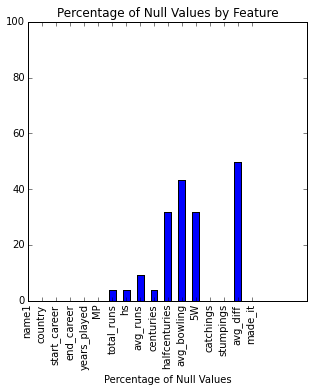

In [821]:
# create chart of 'missing' values 
col_length = len(youth)
missing = (youth.isnull().sum() * 1.0 / col_length) * 100
missing.plot(kind='bar', xlim=(0,20), ylim=(0,100), figsize=(5,5),)
plt.title('Percentage of Null Values by Feature')
plt.xlabel('Percentage of Null Values');

In [822]:
# to do:

# if end_career is 2015/2016 drop from dataset OR if possible use 2015 - 2016 end career tuples as
# test set


In [823]:
youth.shape

(3675, 17)

In [833]:
#pd.Categorical(youth[['name1', 'country', 'start_career', 'end_career', 'years_played',
#        'MP', 'total_runs', 'hs', 'avg_runs', 'centuries',
#       'halfcenturies', 'avg_bowling', '5W', 'catchings',
#       'stumpings', 'avg_diff', 'made_it']])

In [839]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

model = RandomForestClassifier(n_estimators=50)

# Continue to add features to X
# Build dummy features, include quantitative features, or add text features
X = youth[['name1', 'country', 'start_career', 'end_career', 'years_played',
          'MP', 'total_runs', 'hs', 'avg_runs', 'centuries',
       'halfcenturies', 'avg_bowling', '5W', 'catchings',
       'stumpings', 'avg_diff', 'made_it']]

y = X['made_it']

X.drop('made_it', axis=1, inplace=True)


## 2a. Evaluate predictive performance for the given feature set
scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))


scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))


## 2b. Evaluating feature importances

# Fit a model on the whole dataset
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

ValueError: could not convert string to float: Aus